In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import sklearn.preprocessing as pp
from matplotlib.ticker import MaxNLocator, LogFormatter
from matplotlib import rcParams
from matplotlib.colors import LogNorm
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 9
rcParams['font.family'] = 'sans-serif'
rcParams['grid.color'] = 'k'
rcParams['grid.linewidth'] = 0.2
my_locator = MaxNLocator(6)
singlecolsize = (3.3522420091324205, 2.0717995001590714)
doublecolsize = (7.100005949910059, 4.388044997370)

# K-Means

In [10]:
features = pd.read_csv('features.csv')
features.loc[:,'contrast_fit']=np.log10(features.contrast/np.median(features.contrast))
features.loc[:,'N50_fit'] = np.log10(1+features['N50'])
features.loc[:,'sum_fit']=np.log10(features['sum']/np.median(features['sum']))

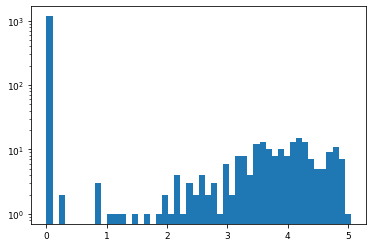

In [28]:
plt.figure()
plt.hist(np.log10(1+features.N50),log=True, bins=50)
plt.show()

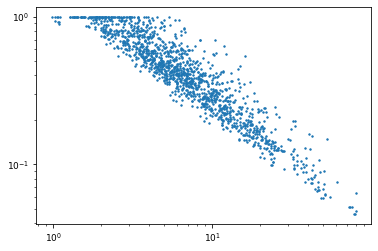

In [17]:
plt.figure()
plt.scatter(features.mean_std_ratio, features.contrast, s=2)
plt.xscale('log')
plt.yscale('log')
plt.show()

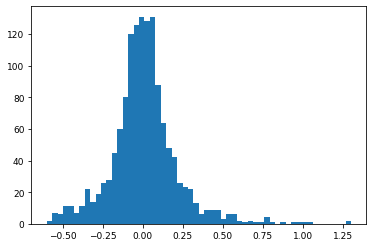

In [14]:
plt.figure()
plt.hist(features.sum_fit, bins='fd')
plt.show()

In [20]:
model = KMeans(2,random_state=10)
labels=model.fit_predict(features[['N50_fit','contrast_fit','sum_fit']])
features['poor_quality_flag']=labels

print("Percentage of poor-quality images: {:0.2f}".format(100*np.sum(labels)/len(labels)))

Percentage of poor-quality images: 14.37


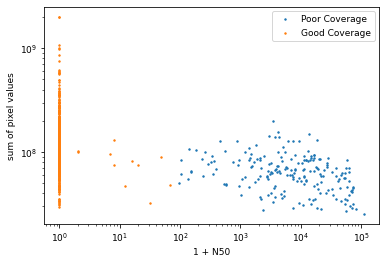

In [21]:
plt.figure()
sel = (features['poor_quality_flag']==1.)
plt.scatter(features.N50[sel]+1,features['sum'][sel],s=2,label='Poor Coverage')
sel = (features['poor_quality_flag']==0.)
plt.scatter(features.N50[sel]+1,features['sum'][sel],s=2,label='Good Coverage')
plt.xlabel("1 + N50")
plt.ylabel("sum of pixel values")
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')
plt.show()

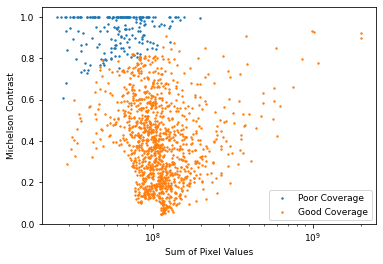

In [5]:
plt.figure()
sel = (features['poor_quality_flag']==1.)
plt.scatter(features['sum'][sel],features.contrast[sel],s=2,label='Poor Coverage')
sel = (features['poor_quality_flag']==0)
plt.scatter(features['sum'][sel],features.contrast[sel],s=2,label='Good Coverage')
plt.xlabel("Sum of Pixel Values")
plt.ylabel("Michelson Contrast")
plt.xscale('log')
plt.legend(loc='best')
plt.show()

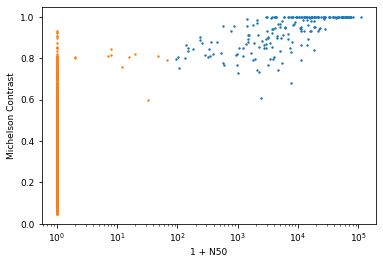

In [6]:
plt.figure()
sel = (features['poor_quality_flag']==1.)
plt.scatter(features.N50[sel]+1,features.contrast[sel],s=2,label='Poor Coverage')
sel = (features['poor_quality_flag']==0)
plt.scatter(features.N50[sel]+1,features.contrast[sel],s=2,label='Good Coverage')
plt.xlabel("1 + N50")
plt.ylabel("Michelson Contrast")
plt.xscale('log')
plt.show()

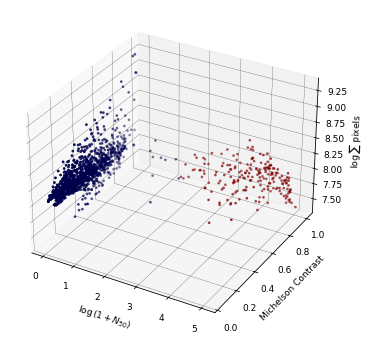

In [7]:
fig = plt.figure(figsize=(7,6))
ax = plt.axes(projection='3d')
sc=ax.scatter3D(np.log10(1+features['N50']), features['contrast'], np.log10(features['sum']), s=3, c=features.poor_quality_flag, cmap='seismic')
ax.set_xlabel(r"$\log\left(1+N_{\rm 50}\right)$")
ax.set_ylabel("Michelson Contrast")
ax.set_zlabel(r"$\log \sum$ pixels")
plt.show()